BT Career Challenge

1. Check the data, adjust data, delete null value

1.1 Import needed libraries and data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# functions for modelling
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

d:\Software\Anaconda\InstallEvi\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# use pandas import data
df_customer = pd.read_csv('./Data/Data Set.csv')
df_customer

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Monthtomonth,Yes,Electronic check,29.85,29.85,No
1,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Monthtomonth,Yes,Mailed check,53.85,108.15,Yes
2,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Monthtomonth,Yes,Electronic check,70.70,151.65,Yes
3,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Monthtomonth,Yes,Electronic check,99.65,820.5,Yes
4,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Monthtomonth,Yes,Credit card (automatic),89.10,1949.4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4807-IZYOZ,Female,0,No,No,51,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75,No
7039,9710-NJERN,Female,0,No,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,826,No
7040,9281-CEDRU,Female,0,Yes,No,68,Yes,No,DSL,No,...,No,Yes,Yes,No,Two year,No,Bank transfer (automatic),64.10,4326.25,No
7041,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No


In [3]:
# check the datatype and the number of records
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# check the number of churn
df_customer.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

From the inital exploration, we can see we have 21 columns covering customers' features, and the most important feature churn has 1869 customers who left BT services (indicating it is an imbalanced dataset). It is time to validate data including:
- delete unuseful columns, like customerID
- delete null values
- check if customers is unique
- convert some features from string to numeric values
- merge some categories in features

1.2 Sort out data

To process logistic regression, the values in columns should be transformed:
- Change data type
- Merge categories
- Generate dummy variable for categorical variables (One hot encoding)

In [5]:
# drop customerID
df_customer.drop('customerID', axis = 'columns', inplace = True)
df_customer.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5537,Male,0,No,No,66,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.70,1253.8,No
4409,Male,1,No,No,45,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Credit card (automatic),62.70,2791.5,Yes
4141,Female,1,No,No,46,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,Credit card (automatic),95.25,4424.2,Yes
5199,Male,0,Yes,Yes,47,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Electronic check,40.30,1794.8,No
4500,Male,0,No,Yes,33,No,No phone service,DSL,Yes,No,No,Yes,No,No,One year,No,Credit card (automatic),34.05,1113.95,No


In [6]:
# convert TotalCharges from categorical values to numerical values
df_customer['TotalCharges'] = pd.to_numeric(df_customer.TotalCharges, errors='coerce')

In [7]:
# check the unique values of each feature
def print_unique_col_values(df):
    for column in df:
        if df[column].dtype == 'object':
            print(f'{column}: {df[column].unique()}')

print_unique_col_values(df_customer)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Monthtomonth' 'Two year' 'One year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Churn: ['No' 'Yes']


In [8]:
# replace No internet service to No, replace No phone service to No
df_customer.replace('No phone service', 'No', inplace = True)
df_customer.replace('No internet service', 'No', inplace = True)
df_customer.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4578,Female,1,No,No,71,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,105.9,7521.95,No
912,Male,0,Yes,Yes,11,Yes,No,Fiber optic,No,No,No,No,Yes,No,Monthtomonth,Yes,Bank transfer (automatic),79.5,868.50,Yes
3862,Female,0,No,No,4,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Monthtomonth,Yes,Mailed check,60.4,272.15,Yes
4588,Female,0,Yes,Yes,61,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,No,Yes,One year,Yes,Credit card (automatic),100.7,6018.65,No
5105,Female,0,No,No,70,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,Electronic check,98.9,6838.60,No


In [9]:
# convert yes to 1, no to 0 for analysis; male to 1, female to 0 for analysis
mapping_dict = {'Male': 0, 'Female': 1, 'No': 0, 'Yes': 1}

cols_to_replace = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                   'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

df_customer[cols_to_replace] = df_customer[cols_to_replace].replace(mapping_dict)
df_customer.sample(5)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1464,1,0,0,0,19,1,1,Fiber optic,1,1,0,0,0,1,Monthtomonth,1,Electronic check,95.15,1789.25,1
1621,1,0,0,0,4,1,1,Fiber optic,0,1,0,0,0,0,Monthtomonth,1,Mailed check,80.30,324.20,0
2028,1,0,0,0,1,1,0,No,0,0,0,0,0,0,Monthtomonth,0,Mailed check,20.50,20.50,0
3048,0,0,0,0,1,1,0,No,0,0,0,0,0,0,Monthtomonth,0,Mailed check,20.20,20.20,0
4754,0,0,1,0,55,1,1,Fiber optic,0,0,1,1,1,1,One year,1,Electronic check,104.15,5743.05,1


In [10]:
# generate dummy variables for categorical variables
df_customer_clean = pd.get_dummies(df_customer,columns=['InternetService','Contract','PaymentMethod'])
df_customer_clean.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Monthtomonth,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2029,1,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
5754,0,0,1,1,60,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
6136,0,0,0,0,58,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
133,1,0,1,1,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3852,1,0,1,0,27,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0


In [11]:
# scaling data to avoid bias
column_to_scale = ['tenure','MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_customer_clean[column_to_scale] = scaler.fit_transform(df_customer_clean[column_to_scale])

In [12]:
# delete records with missing values
df_customer_clean.dropna(axis=0, inplace=True)
df_customer_clean.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Monthtomonth,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2158,0,0,0,0,0.736111,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
553,0,0,0,0,0.291667,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2103,1,0,0,0,0.208333,1,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1961,1,0,1,1,0.194444,1,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1090,0,0,0,0,0.111111,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0


In [13]:
df_customer_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   float64
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 no

2. Modelling

After preparing data, there are several steps to build model:
- Split data into training dataset and test dataset

2.1 Split data

In [14]:
# keep columns except churn, copy it to avoid modifying the original one, set datatype as float
X = df_customer_clean.drop(columns = ['Churn']).copy().astype(float)


y = np.ravel(df_customer_clean[['Churn']]).astype(float)

In [15]:
X.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Monthtomonth,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4058,1.0,0.0,1.0,0.0,0.916667,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5339,1.0,1.0,0.0,0.0,0.777778,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4928,1.0,0.0,0.0,1.0,0.305556,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1609,0.0,1.0,0.0,0.0,0.736111,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6560,0.0,0.0,1.0,1.0,0.736111,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [16]:
pd.Series(y).value_counts()

0.0    5163
1.0    1869
dtype: int64

In [17]:
# split training and test sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.20, random_state=6, stratify = y)

In [18]:
pd.Series(y_train).value_counts()

0.0    4130
1.0    1495
dtype: int64

In [19]:
pd.Series(y_test).value_counts()

0.0    1033
1.0     374
dtype: int64

In [20]:
X_train.shape

(5625, 26)

In [21]:
X_train.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Monthtomonth,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4998,1.0,0.0,0.0,1.0,0.055556,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1521,1.0,0.0,0.0,0.0,0.208333,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4565,0.0,0.0,0.0,0.0,0.944444,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
637,1.0,0.0,0.0,0.0,0.027778,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6303,1.0,0.0,0.0,0.0,0.527778,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


2.2 Logistic Regression

In [58]:
def log_reg(X_train, y_train, X_test, y_test, weights):
    if weights==-1:
        model = LogisticRegression()
    else:
        model = LogisticRegression(class_weight={0:weight[0], 1:weights[1]})

    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print('Accuracy', acc, '\n')

    y_pred = model.predict(X_test)
    print('preds', y_pred[:5], '\n')

    cl_rep = classification_report(y_test, y_pred)
    print(cl_rep)

    # create dataframe of coeffiecents so they can be inspected

    df_summary = pd.DataFrame(model.coef_, columns = X_train.columns, index = ['Coeffs'])
    df_summary['intercept'] = model.intercept_
    return df_summary.transpose()


In [59]:
# set weights -1
weights = -1
summary = log_reg(X_train, y_train, X_test, y_test, weights)
summary

Accuracy 0.820184790334044 

preds [1. 0. 0. 1. 0.] 

              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88      1033
         1.0       0.70      0.57      0.63       374

    accuracy                           0.82      1407
   macro avg       0.78      0.74      0.76      1407
weighted avg       0.81      0.82      0.81      1407



,Coeffs
gender,0.029323
SeniorCitizen,0.217162
Partner,0.066415
Dependents,-0.238103
tenure,-3.247718
PhoneService,-0.547581
MultipleLines,0.273929
OnlineSecurity,-0.432542
OnlineBackup,-0.143359
DeviceProtection,-0.012091


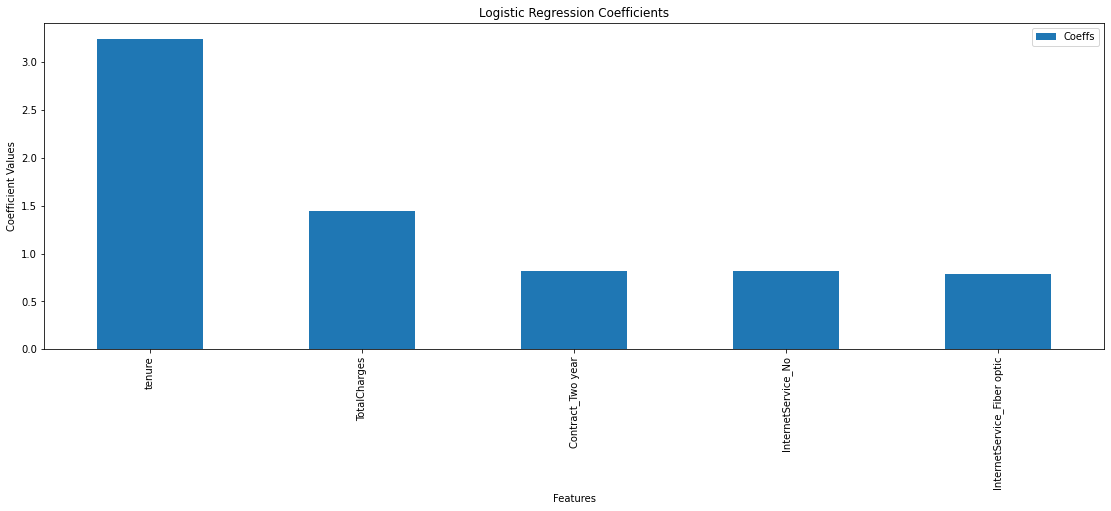

In [63]:
# sort dataframe by absolute value of coefficients
summary_sorted = summary.drop('intercept', axis=0).abs().sort_values(by='Coeffs', ascending=False)

# get top 5 rows
top_5 = summary_sorted.iloc[:5]

# create bar plot for top 5 rows
top_5.plot(kind='bar', figsize=(19, 6))

# set title and labels
plt.title('Logistic Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Values')

# show plot
plt.show()

